In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
from textblob import TextBlob

from wordcloud import WordCloud, STOPWORDS

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.metrics import accuracy_score,f1_score
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import re   
import nltk 
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download('punkt')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem.porter import *
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import word_tokenize
from bs4 import BeautifulSoup
import re



%matplotlib inline

### **Data Extraction & Cleaning**

In [2]:
reddit_data = pd.read_csv('D:/NLP Project/Reddit_Data.csv')
twitter_data = pd.read_csv('D:/NLP Project/Twitter_Data.csv')

In [3]:
reddit_data.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [4]:
reddit_data.isnull().sum()

clean_comment    100
category           0
dtype: int64

In [5]:
reddit_data.shape

(37249, 2)

In [6]:
twitter_data.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [7]:
twitter_data.isnull().sum()

clean_text    4
category      7
dtype: int64

In [8]:
twitter_data.shape

(162980, 2)

In [9]:
def cleanText(string):
    punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    cleanedText = ' '.join(''.join([i for i in string if not i.isdigit()]).split())
    
    for i in punc:
        cleanedText = cleanedText.replace(i, '')
        
    a = [i for i in cleanedText if i.isalpha() or i == ' ']
            
    final_text = ' '.join(''.join(a).split())
    return final_text

***Cleaning Data***

In [10]:
reddit_data = reddit_data.dropna(how='any')
twitter_data = twitter_data.dropna(how='any')

In [11]:
reddit_data.rename(columns={'clean_comment':'comment'}, inplace=True)
twitter_data.rename(columns={'clean_text':'comment'}, inplace=True)

reddit_data.category = reddit_data.category.apply(lambda x: int(x))
twitter_data.category = twitter_data.category.apply(lambda x: int(x))

reddit_data.comment = reddit_data.comment.apply(cleanText)
twitter_data.comment = twitter_data.comment.apply(cleanText)

In [12]:
reddit_data.drop_duplicates(subset='comment', keep=False, inplace=True)
twitter_data.drop_duplicates(subset='comment', keep=False, inplace=True)

In [13]:
# Concat reddit data and twiter data
concat_df = pd.concat([reddit_data, twitter_data], ignore_index=True)
concat_df.drop_duplicates(subset='comment', keep=False, inplace=True)

In [14]:
concat_df.head()

,comment,category
0,family mormon have never tried explain them th...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [15]:
non_edited_concat = concat_df

***Removing Stopwords***

In [16]:
def wordopt(text):
    text = BeautifulSoup(text, "html.parser").get_text()
    text = text.lower()
    text = re.sub(r"[^a-zA-Z]", " ", text)
    text = text.split()
    text = ' '.join(text)
    return text

stopword_list = stopwords.words('english')
def stopwords(text):
    tokens = word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    filtered_tokens = [token for token in tokens if token not in stopword_list]
    return filtered_tokens

In [17]:
concat_df['comment']=concat_df['comment'].apply(wordopt)

In [18]:
concat_df.head()

,comment,category
0,family mormon have never tried explain them th...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [19]:
concat_df.category = concat_df.category.apply(lambda x: int(x))

In [20]:
concat_df['comment']=concat_df['comment'].apply(stopwords)

In [21]:
concat_df.head()

,comment,category
0,"[family, mormon, never, tried, explain, still,...",1
1,"[buddhism, much, lot, compatible, christianity...",1
2,"[seriously, say, thing, first, get, complex, e...",-1
3,"[learned, want, teach, different, focus, goal,...",0
4,"[benefit, may, want, read, living, buddha, liv...",1


***Applying Lemmatization***

In [22]:
lemmatizer = WordNetLemmatizer() 
def lemma(text):  
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in text] 
    text = ' '.join(lemmas)    
    return text

***Applying Stemming***

In [ ]:
stemmer = PorterStemmer()
def stem(text):  
    lemmas = [stemmer.stem(word, pos ='v') for word in text] 
    text = ' '.join(lemmas)    
    return text

In [23]:
concat_df['comment']=concat_df['comment'].apply(lemma)

In [24]:
concat_df.head()

,comment,category
0,family mormon never try explain still stare pu...,1
1,buddhism much lot compatible christianity espe...,1
2,seriously say thing first get complex explain ...,-1
3,learn want teach different focus goal wrap pap...,0
4,benefit may want read live buddha live christ ...,1


### **Data Visualization**

***Compare Total Comments From both Platforms***

In [25]:
counts = [len(reddit_data), len(twitter_data), len(concat_df)]
labels = ['Reddit', 'Twitter', 'Total']
colors = ['#ff4500', '#1DA1F2', '#50C878']

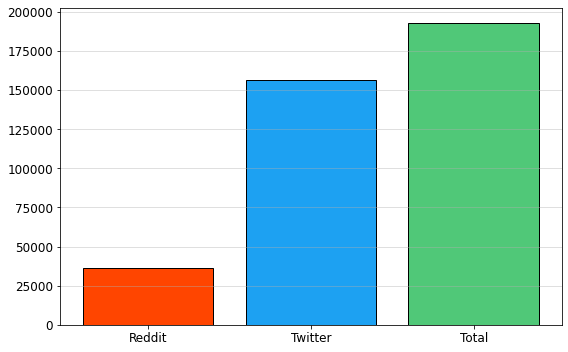

In [26]:
plt.figure(figsize=(8,5))

plt.bar(labels, counts, color=colors, edgecolor='black')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(axis='y', alpha=0.5)
plt.tight_layout()

***Count The Negative, Neutral, and Positive Comments***

In [27]:
negative_count = [len(reddit_data[reddit_data.category == -1]),
                 len(twitter_data[twitter_data.category == -1]),
                 len(concat_df[concat_df.category == -1])]

neutral_count = [len(reddit_data[reddit_data.category == 0]),
                 len(twitter_data[twitter_data.category == 0]),
                 len(concat_df[concat_df.category == 0])]

positive_count = [len(reddit_data[reddit_data.category == 1]),
                 len(twitter_data[twitter_data.category == 1]),
                 len(concat_df[concat_df.category == 1])]

x = ['Reddit', 'Twitter', 'Total']
x_indexes = np.arange(len(x))
width = 0.25

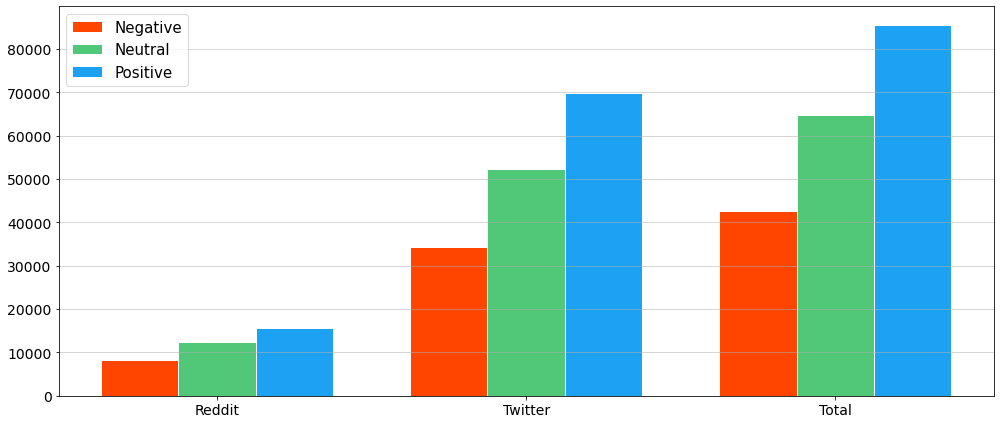

In [28]:
plt.figure(figsize=(14,6))

plt.bar(x_indexes - width, negative_count, width=width, label='Negative', edgecolor='white', color='#ff4500')
plt.bar(x_indexes, neutral_count, width=width, label='Neutral', edgecolor='white', color='#50C878')
plt.bar(x_indexes + width, positive_count, width=width, label='Positive', edgecolor='white', color='#1DA1F2')

plt.yticks(fontsize=14)
plt.xticks(ticks=x_indexes, labels=x, fontsize=14)

plt.legend(prop={'size':15})
plt.grid(axis='y', alpha=0.65)
plt.tight_layout()

***Count the Average Length of All the 3 Sentiments Comment***

In [29]:
negative_avg = int(sum([len(i) for i in concat_df[concat_df.category == -1].comment]) / len(concat_df[concat_df.category == 1]))
neutral_avg = int(sum([len(i) for i in concat_df[concat_df.category == 0].comment]) / len(concat_df[concat_df.category == 0]))
positive_avg = int(sum([len(i) for i in concat_df[concat_df.category == 1].comment]) / len(concat_df[concat_df.category == 1]))

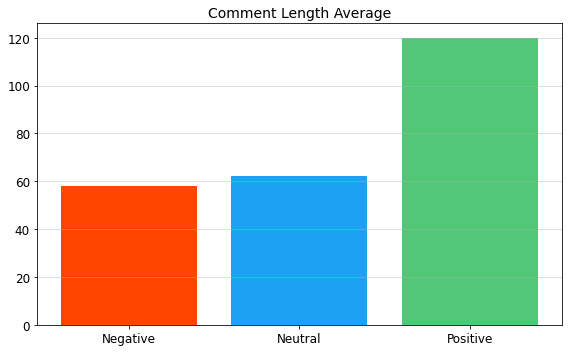

In [30]:
plt.figure(figsize=(8,5))

plt.bar(['Negative', 'Neutral', 'Positive'], [negative_avg, neutral_avg, positive_avg], color=colors)

plt.title('Comment Length Average', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(axis='y', alpha=0.5)
plt.tight_layout()

***Create Word Clouds to See Which Words Appear Frequently***

In [31]:
negative_words = ''
neutral_words = ''
positive_words = ''

stopwords = set(STOPWORDS)

for comment, category in zip(concat_df.comment, concat_df.category):
    tokens = comment.split()
    
    for word in tokens:
        if category == -1:
            negative_words += word + ' '
        elif category == 0:
            neutral_words += word + ' '
        else:
            positive_words += word + ' '

In [32]:
negative_cloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(negative_words)

neutral_cloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(neutral_words)

positive_cloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(positive_words)

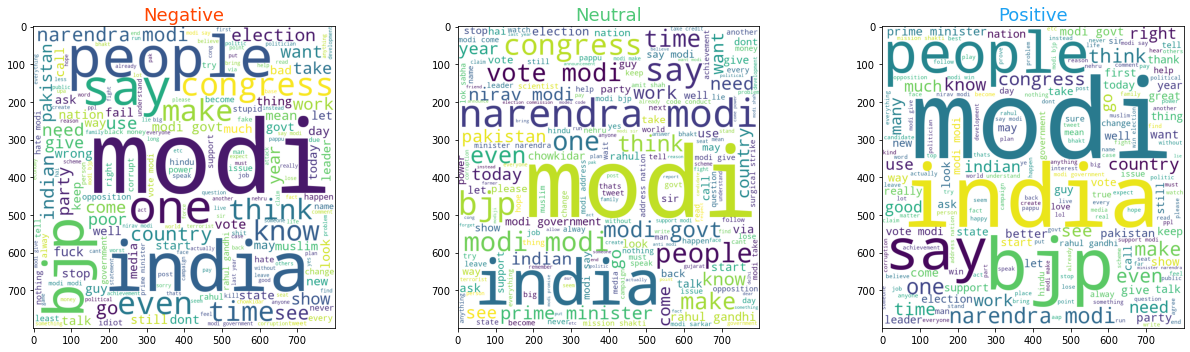

In [33]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18, 5), facecolor=None)

ax1.imshow(negative_cloud)
ax1.set_title('Negative', fontsize=18, color='#ff4500')


ax2.imshow(neutral_cloud)
ax2.set_title('Neutral', fontsize=18, color='#50C878')

ax3.imshow(positive_cloud)
ax3.set_title('Positive', fontsize=18, color='#1DA1F2')

plt.tight_layout()

### **Split Test & Train Data**

***Balancing the Data (The Amount of Negatives, Neutrals, and Positives)***

In [34]:
class Data:
    def __init__(self, df):
        self.df = df
        
    def fixData(self):
        dataframe = self.df
        lowest_len = min([i for i in dataframe.category.value_counts()])
        
        # Create the final data frame
        final_df = pd.concat([dataframe[dataframe.category == -1][:lowest_len],
                             dataframe[dataframe.category == 0][:lowest_len],
                             dataframe[dataframe.category == 1][:lowest_len]])
        
        # To shuffle the rows in the data frame
        final_df = final_df.sample(frac=1).reset_index(drop=True)
        return final_df

***Split Train and Test Data***

In [35]:
a = Data(concat_df)
fixed_df = a.fixData()
print(f'Before: \n{concat_df.category.value_counts()}\n')
print(f'After: \n{fixed_df.category.value_counts()}')

Before: 
 1    85581
 0    64771
-1    42628
Name: category, dtype: int64

After: 
 0    42628
-1    42628
 1    42628
Name: category, dtype: int64


In [36]:
fixed_df.shape

(127884, 2)

In [37]:
train_X, test_X, train_y, test_y = train_test_split([i for i in fixed_df.comment], [i for i in fixed_df.category], test_size=0.25, random_state=1)

***Feature Selection and extraction***

***Vectorizing the Comment***

***Using Bag of words***

In [59]:
vectorizer = CountVectorizer()
train_X_vectors = vectorizer.fit_transform(train_X)
test_X_vectors = vectorizer.transform(test_X)

In [39]:
train_X_vectors.shape

(95913, 74508)

In [40]:
test_X_vectors.shape

(31971, 74508)

***Using TFIDF***

In [41]:
vectorizer = TfidfVectorizer()
train_X_vectors = vectorizer.fit_transform(train_X)
test_X_vectors = vectorizer.transform(test_X)

In [42]:
train_X_vectors.shape

(95913, 74508)

In [43]:
test_X_vectors.shape

(31971, 74508)

### **Creating Models**

***Linear SVC***

In [40]:
clf_svm = LinearSVC()
clf_svm.fit(train_X_vectors, train_y)
clf_prediction = clf_svm.predict(test_X_vectors)

print(f'Accuracy: {clf_svm.score(test_X_vectors, test_y)}')
print(f'Accuracy: {f1_score(test_y, clf_prediction, average=None, labels=[-1, 0, 1])}')

Accuracy: 0.8648775452754058
Accuracy: [0.85199559 0.88604547 0.85490044]


***MultinomialNB***

In [42]:
svm_mnb = MultinomialNB()
svm_mnb.fit(train_X_vectors, train_y)
mnb_prediction = svm_mnb.predict(test_X_vectors)

print(f'Accuracy: {svm_mnb.score(test_X_vectors, test_y)}')
print(f'Accuracy: {f1_score(test_y, mnb_prediction, average=None, labels=[-1, 0, 1])}')

Accuracy: 0.6798035719871133
Accuracy: [0.71154005 0.59712536 0.70541804]


***Decision Tree Classifier***

In [43]:
svm_dtc = DecisionTreeClassifier()
svm_dtc.fit(train_X_vectors, train_y)
dtc_prediction = svm_dtc.predict(test_X_vectors)

print(f'Accuracy: {svm_dtc.score(test_X_vectors, test_y)}')
print(f'Accuracy: {f1_score(test_y, dtc_prediction, average=None, labels=[-1, 0, 1])}')

Accuracy: 0.7601263645178443
Accuracy: [0.71908485 0.81846904 0.73913043]


***Feature Extraction and Generation***

***Using Textblob***

***Creating new features adding polarity and subjectivity***

In [44]:
def polarity(text):
    return TextBlob(text).sentiment.polarity
def subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

fixed_df['polarity'] = fixed_df.comment.apply(polarity)
fixed_df['subjectivity'] = fixed_df.comment.apply(subjectivity)


In [45]:
fixed_df.head()

,comment,category,polarity,subjectivity
0,give congress years,0,0.000000,0.000000
1,yes real reason apply old fart like advani wel...,-1,0.077500,0.437500
2,nothing jln make launch satellite present sham...,-1,-0.100000,0.150000
3,congress party perhaps know black money accoun...,-1,-0.355556,0.377778
4,table change,0,0.000000,0.000000


***Discarding comment for random forest***

In [46]:
X, y = fixed_df.iloc[:,-2:],fixed_df.iloc[:,-3]
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.25, random_state=1)

In [47]:
train_X.shape

(95913, 2)

In [49]:
train_y.shape

(95913,)

***Logistic Regression***

In [57]:
log_reg = LogisticRegression()
log_reg.fit(train_X, train_y)
log_reg_prediction = log_reg.predict(test_X)

print(f'Accuracy: {log_reg.score(test_X, test_y)}')
print(f'Accuracy: {f1_score(test_y, log_reg_prediction, average=None, labels=[-1, 0, 1])}')

Accuracy: 0.8286572206061743
Accuracy: [0.7985675  0.82670112 0.86104828]


***Linear SVC***

In [56]:
linear_svm= LinearSVC()
linear_svm.fit(train_X, train_y)
svm_prediction = linear_svm.predict(test_X)

print(f'Accuracy: {linear_svm.score(test_X, test_y)}')
print(f'Accuracy: {f1_score(test_y, svm_prediction, average=None, labels=[-1, 0, 1])}')

Accuracy: 0.8286572206061743
Accuracy: [0.7985675  0.82670112 0.86104828]


***Decision Tree Classifier***

In [60]:
svm_dtc = DecisionTreeClassifier()
svm_dtc.fit(train_X, train_y)
dtc_prediction = svm_dtc.predict(test_X)

print(f'Accuracy: {svm_dtc.score(test_X, test_y)}')
print(f'Accuracy: {f1_score(test_y, dtc_prediction, average=None, labels=[-1, 0, 1])}')

Accuracy: 0.8653467204654218
Accuracy: [0.8395891  0.894206   0.85864076]


***Random Forest Classifier***

In [52]:
rnf = RandomForestClassifier()
rnf.fit(train_X, train_y)
rnf_preds = rnf.predict(test_X)
print(f'Accuracy: {accuracy_score(test_y,rnf_preds)}')
print(f'Accuracy: {f1_score(test_y, rnf_preds, average=None, labels=[-1, 0, 1])}')

Accuracy: 0.8764505332957994
Accuracy: [0.85539533 0.89546627 0.87590057]


In [69]:
temp = "I eat food and its not tasty"
sample = [[polarity(temp),subjectivity(temp)]]
print(rnf.predict(sample))

[0]


D:\Anaconda\envs\nlp\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
